# Importances of features

Determine the importance of features for models with high accuracy. This is to determine if any n-grams can be directly related to the outcome of the judgement. 

In [40]:
#Imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import autosklearn.classification

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


import functions 
classif = functions.classification()

In [41]:
#Fit model
def trainTest(features):
    """Return train test split from features"""
    #print(features['target'])
    X = features.drop(columns='target')
    X=(X-X.mean())/X.std() #Normalise
    y = features['target']
    return train_test_split(X, y, test_size=0.10, random_state=90)

def testSVM(path,C=1,kernel='linear'):
    """
    Fits a SVM 
    """
    
    features = pd.read_csv(path)
    X_train, X_test, y_train, y_test = trainTest(features)
    
    X_train.fillna(value=0,inplace=True)
    
    model = SVC(kernel=kernel, C=C)
    model.fit(X_train,y_train)
    
    predictions = model.predict(X_test)
    results = classif.results(y_test,predictions)
    
    names = X_train.columns
    
    return model,predictions,results,names    

In [42]:
path = "/Users/conorosully/Documents/Legal-Case-Prediction/data/features/{}/article{}_{}.csv"

folder = 'english'
article = '6'
part = 'law'

model,predictions,results,names = testSVM(path.format(folder,article,part))
print(names)

0.9456521739130435
[[50  0]
 [ 5 37]]
              precision    recall  f1-score   support

nonviolation       0.91      1.00      0.95        50
   violation       1.00      0.88      0.94        42

 avg / total       0.95      0.95      0.95        92

Index(['ability', 'able', 'absence', 'absent', 'absolute', 'abuse', 'accept',
       'accepted', 'accepts', 'access',
       ...
       'weight', 'wide', 'witness', 'witnesses', 'words', 'work', 'written',
       'year', 'years', 'years months'],
      dtype='object', length=2000)


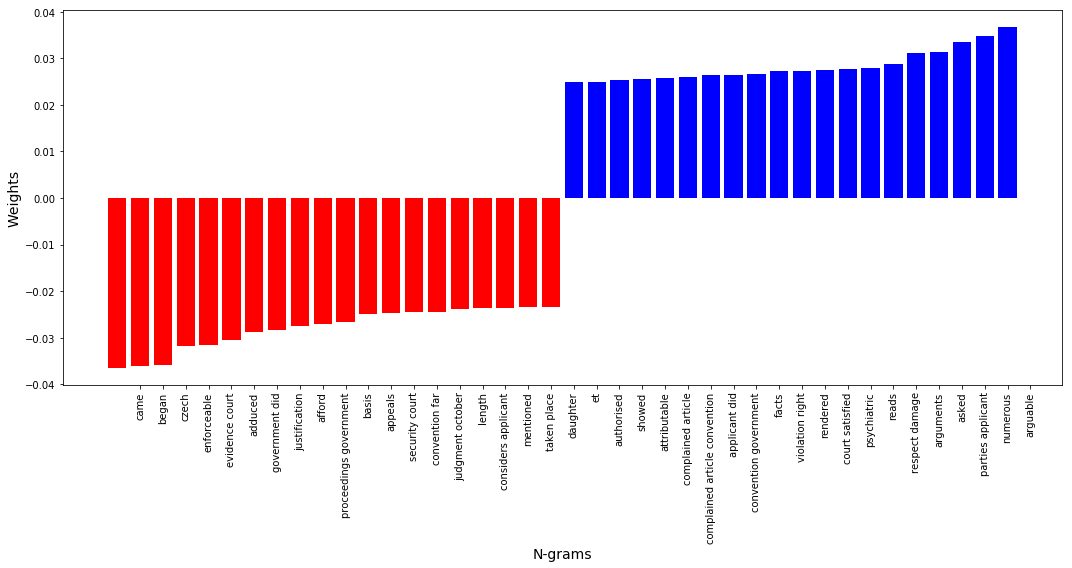

In [51]:
def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    
    # create plot
    plt.figure(figsize=(15, 8))
    
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), 
            coef[top_coefficients],
           color = colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), 
               feature_names[top_coefficients], 
               rotation=90
              )
    feature_names[top_coefficients]
    plt.ylabel("Weights",size = 14)
    plt.xlabel("N-grams",size = 14)
    
    
    path = "/Users/conorosully/Google Drive/Trinity/Dissertation/Docs/Final/Sections/Figures/weights_{}.eps"
    plt.tight_layout()
    plt.savefig(path.format('law'),format='eps',dpi=1000)
    plt.show()
    

plot_coefficients(model, names)

In [36]:
coef = model.coef_.ravel()
print(max(coef))
print(min(coef))

0.0367402751863876
-0.036400059472263706
